# Simple Neural Network: Single Layer for an XOR Gate

If I am going to demonstrate that Josephson Junctions can be used for neural networks, I need to create a base model of one and try to adapt it into a model that uses the coupled junctions.
This Neural Network will be based off of the guide found [here](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6).

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def sigmoid(x):
    """
    Defines the sigmoid function
    """
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    """
    Defines the derivative of the sigmoid function
    """
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        # input the feed forward by multiplying first weights by their inputs and then the second weights with the output of the first layer
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

Here the Neural Network has a single hidden layer beyond the input and output later. The neural network uses the sigmoid function for its activation: \
$\sigma(x)=\frac{1}{1+e^{-x}}$ \
The neural network assumes no bias and has two sets of weights. First being 3 weights per input group and then the second just being 3.
The input into the system is data that models an XOR gate for two inputs, meaning that only a single input being one gives an output of one. The guide's function adds a third bit C that is always 1 and does not change the output, so I removed the extra bit just to make the example purely an XOR gate, which looks as follows:

| A | B | A XOR B |
| :---: | :---: | :---: |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In [129]:
# Here are the inputs
x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
# Here are the correct outputs
y = np.array([[0],[1],[1],[0]])

# Initialize neural network
nn = NeuralNetwork(x,y)

loss = []
for i in range(1500):
    nn.feedforward()
    nn.backprop()
    # Calculating loss as a sum of the squares of difference of error
    loss.append(np.sum((y-nn.output)**2))

print(nn.output)

[[0.05122322]
 [0.96182719]
 [0.96357433]
 [0.02623085]]


This neural network is now predicting the values of an XOR gate for any set of inputs. Note that the values are not exact because doing so prevents overfitting, which makes the neural network more capable of accepting more generalized inputs. We can also show the loss function given how many iterations we have trained our network with.

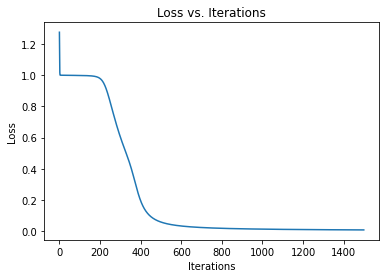

In [8]:
plt.plot(loss)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Loss vs. Iterations')
plt.show()

As we can see, the losses are decaying exponentially and we have diminishing returns, which gives more reason to not increase the iterations without abandon. This simple neural network is a good base model to compare with a neural network comprised of other functions, weights, etcetera. The next task is to now recreate this by using the coupled neurons as the activation and the currents applied to them being the weights.

array([[0.05422859],
       [0.96056165],
       [0.96458842],
       [0.02353955]])

In [110]:
x = np.array([[1,0]])
y = np.array([[1]])

In [126]:
# Here are the inputs
x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
# Here are the correct outputs
y = np.array([[0],[1],[1],[0]])

In [132]:
nn.input = np.array([[1,0]])

In [134]:
nn.feedforward()
nn.output

array([[0.96358919]])